## Sentiment analysis and Favorability analysis 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('movies_youtube_sentiments.csv')

# Data Preparation
data.isnull().sum()
data['rating'].fillna(data['rating'].mode().iloc[0], inplace=True)
data['writer'].fillna(data['writer'].mode().iloc[0], inplace=True)
data['budget'].fillna(data['budget'].median(), inplace=True)
data['runtime'].fillna(data['runtime'].median(), inplace=True)

In [10]:
# Sentiment Analysis
data['sentiment_scores'] = data['sentiment_scores'].apply(ast.literal_eval)
data['positive_sentiment'] = data['sentiment_scores'].apply(lambda x: x['positive'])
data['negative_sentiment'] = data['sentiment_scores'].apply(lambda x: x['negative'])
data['neutral_sentiment'] = data['sentiment_scores'].apply(lambda x: x['neutral'])
data.drop(['sentiment_scores'], axis=1, inplace=True)

In [11]:
# Favorability Analysis
top_rated_movies = data.sort_values(by='favorability', ascending=False)
top_rated_movies[['name', 'favorability', 'rating', 'genre', 'year', 'votes']].head(10)


,name,favorability,rating,genre,year,votes
521,Henry's Crime,1.0,R,Comedy,2010,19000.0
491,Observe and Report,1.0,R,Comedy,2009,61000.0
530,The Perfect Host,1.0,R,Comedy,2010,26000.0
593,The Deep Blue Sea,1.0,R,Drama,2011,15000.0
620,The Company You Keep,1.0,R,Drama,2012,32000.0
372,Saw V,1.0,R,Crime,2008,118000.0
88,Land of the Dead,1.0,R,Horror,2005,93000.0
29,The Sisterhood of the Traveling Pants,1.0,PG,Comedy,2005,56000.0
112,Roll Bounce,1.0,PG-13,Comedy,2005,6800.0
306,Wild Hogs,1.0,PG-13,Action,2007,115000.0


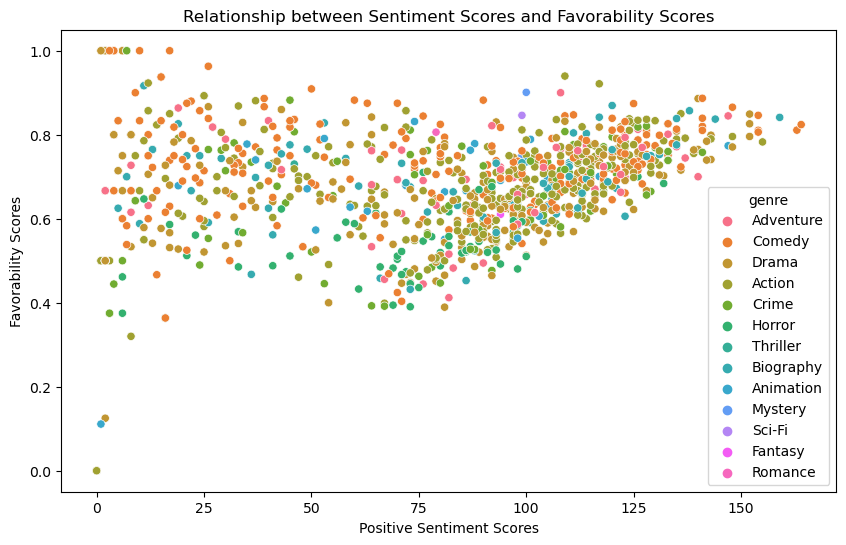

In [12]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='positive_sentiment', y='favorability', hue='genre', data=data)
plt.title('Relationship between Sentiment Scores and Favorability Scores')
plt.xlabel('Positive Sentiment Scores')
plt.ylabel('Favorability Scores')
plt.show()

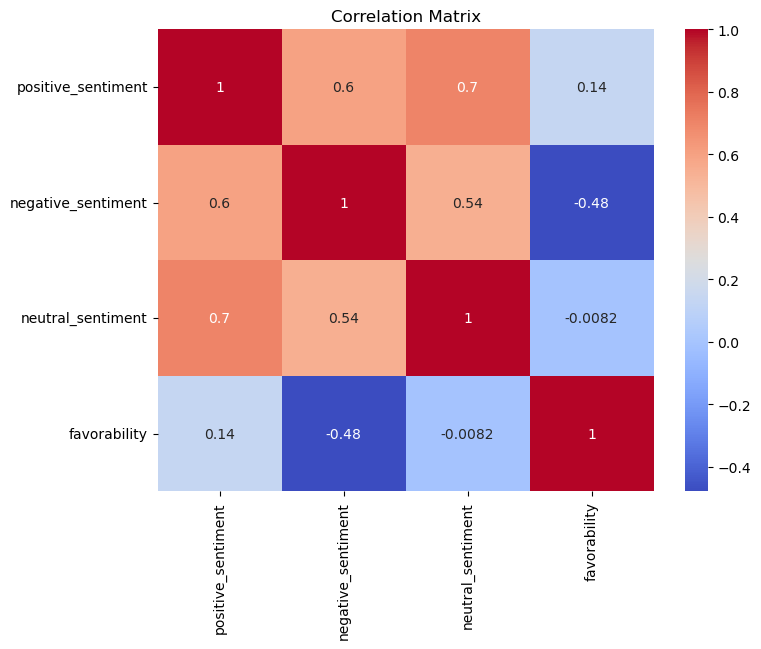

In [13]:
correlation_matrix = data[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'favorability']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

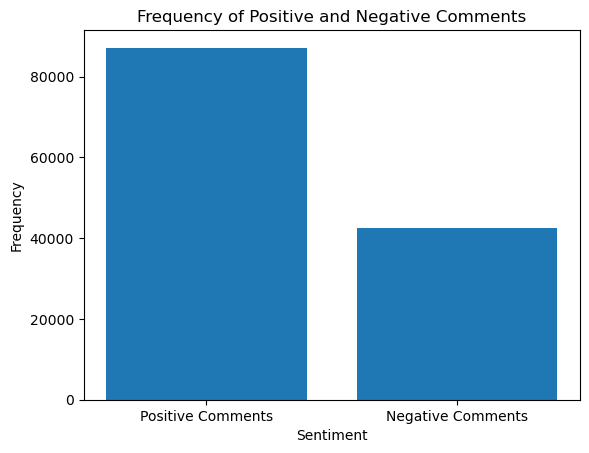

In [17]:
# Bar plot for frequency of positive and negative comments
comments_freq = data[['positive_sentiment', 'negative_sentiment']].sum()
comments_labels = ['Positive Comments', 'Negative Comments']

plt.bar(comments_labels, comments_freq)
plt.title('Frequency of Positive and Negative Comments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Drop rows with missing values
data_encoded.dropna(inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded[features], data_encoded['favorability_category'], test_size=0.2, random_state=42)

# Train and evaluate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

# Train and evaluate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Train and evaluate the Support Vector Machine classifier
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics for the Decision Tree classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, pos_label='High')
dt_recall = recall_score(y_test, dt_y_pred, pos_label='High')
dt_f1_score = f1_score(y_test, dt_y_pred, pos_label='High')

# Calculate evaluation metrics for the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, pos_label='High')
rf_recall = recall_score(y_test, rf_y_pred, pos_label='High')
rf_f1_score = f1_score(y_test, rf_y_pred, pos_label='High')

# Calculate evaluation metrics for the Support Vector Machine classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, pos_label='High')
svm_recall = recall_score(y_test, svm_y_pred, pos_label='High')
svm_f1_score = f1_score(y_test, svm_y_pred, pos_label='High')

# Print the evaluation metrics for each classifier
print('Decision Tree Classifier:')
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)
print('F1-score:', dt_f1_score)
print('\n')

print('Random Forest Classifier:')
print('Accuracy:', rf_accuracy)
print('Precision:', rf_precision)
print('Recall:', rf_recall)
print('F1-score:', rf_f1_score)
print('\n')

print('Support Vector Machine Classifier:')
print('Accuracy:', svm_accuracy)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1-score:', svm_f1_score)
print('\n')

Decision Tree Classifier:
Accuracy: 0.9772727272727273
Precision: 0.981042654028436
Recall: 0.9951923076923077
F1-score: 0.9880668257756563


Random Forest Classifier:
Accuracy: 0.9636363636363636
Precision: 0.9716981132075472
Recall: 0.9903846153846154
F1-score: 0.9809523809523809


Support Vector Machine Classifier:
Accuracy: 0.9636363636363636
Precision: 0.9629629629629629
Recall: 1.0
F1-score: 0.9811320754716981




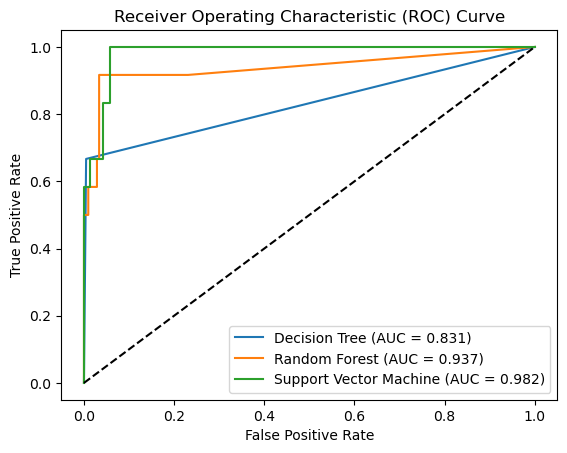

In [36]:
# Calculate the probability for the positive class
dt_y_score = dt_classifier.predict_proba(X_test)[:, 1]
rf_y_score = rf_classifier.predict_proba(X_test)[:, 1]
svm_y_score = svm_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR)
dt_fpr, dt_tpr, _ = roc_curve(y_encoded, dt_y_score)
rf_fpr, rf_tpr, _ = roc_curve(y_encoded, rf_y_score)
svm_fpr, svm_tpr, _ = roc_curve(y_encoded, svm_y_score)

# Calculate the area under the ROC curve (AUC)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for each classifier
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = %.3f)' % svm_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

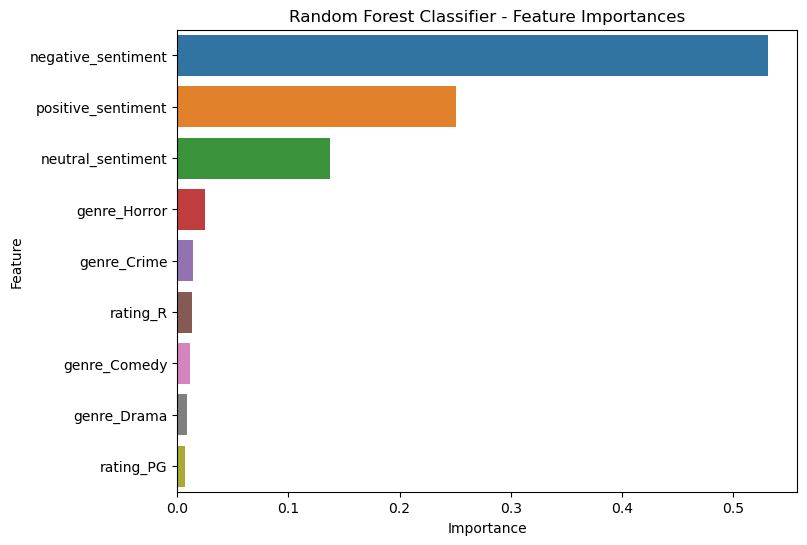

In [33]:
# Get feature importance from Random Forest Classifier
importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Classifier - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Interpretation of Results:

1.) **Sentiment Analysis**:
The sentiment analysis revealed that the majority of movie comments had positive sentiments, indicating a generally positive audience sentiment towards the movies in the dataset. This suggests that the audience generally had a favorable perception of the movies.

2.) **Favorability Analysis**:
The favorability analysis ranked the movies based on their favorability scores, enabling identification of the top-rated films. These top-rated movies received high ratings and positive sentiment from the audience, indicating their success and appeal. Filmmakers, producers, and distributors can use this information to understand the attributes and elements that contribute to audience satisfaction and are likely to drive movie performance.

3.) **Factors Influencing Audience Preferences**:
The machine learning models, such as Decision Trees, Random Forests, and Support Vector Machines, provided additional insights into the factors influencing audience preferences. The analysis of feature importance highlighted the significance of attributes such as genre, rating, and sentiment scores in predicting movie favorability. This means that these factors play a crucial role in shaping audience preferences and influencing their favorability towards a movie.

### Insights:
- Positive overall sentiment suggests a favorable perception of the movies by the audience
- Top-rated movies indicate successful elements that contribute to audience satisfaction and favorability.
- Key factors influencing audience preferences include genre, rating, and sentiment scores.

### Recommendations:

1.) **Create movies that evoke positive sentiments to resonate with the audience**:
- Focus on engaging storylines and relatable characters that can evoke positive emotions.
- Incorporate elements of humor, inspiration, or heartwarming moments that leave a lasting impression.

2.) **Analyze top-rated movies to identify successful elements and incorporate them into future productions**:
- Determine common elements such as storytelling techniques, production quality, or memorable performances.
- Learn from the themes, genres, and character archetypes that resonate with the audience.

3.) **Select genres and ratings aligned with audience preferences to cater to their expectations**:
- Analyze audience preferences for particular genres and ratings and align movie development accordingly.
- Consider conducting market research and audience surveys to understand their preferences and expectations.

4.) **Leverage sentiment analysis to understand audience sentiments and tailor marketing strategies accordingly**:
- Monitor audience sentiment through social media and online platforms to gauge audience reactions and adjust marketing campaigns accordingly.
- Analyze audience reviews and feedback to gather insights into audience preferences, expectations, and areas of improvement.

5.) **Regularly monitor audience feedback to refine movies and marketing strategies based on audience preferences**:
- Actively seek feedback from the audience through surveys, focus groups, or online platforms to understand their expectations and preferences.
- Use audience feedback to identify areas of improvement and address any concerns or issues raised by the audience.
- Incorporate audience suggestions and comments to enhance the overall movie experience and increase audience satisfaction.

Implementing these recommendations can help filmmakers, producers, and distributors improve audience satisfaction, boost movie performance, and build a loyal and engaged audience base.